In [4]:
cd ../..

c:\Users\capett\sas-trustworthy-ai-examples


In [7]:
from python.utils.preprocessing import load_data, handle_missing_values, detect_column_types, encode_categorical_data, scale_features, feature_selection, split_data, correlation_matrix, identify_proxy_variables, frequency_distribution

In [8]:
data = load_data('data/german_credit_data.csv')

data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,3,NaN,little,1169,6,radio/TV
1,1,22,female,2,3,little,moderate,5951,48,radio/TV
2,2,49,male,1,3,little,NaN,2096,12,education
3,3,45,male,2,2,little,little,7882,42,furniture/equipment
4,4,53,male,2,2,little,little,4870,24,car


In [9]:
processed_data = handle_missing_values(data, strategy='mean')

processed_data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,3,little,little,1169,6,radio/TV
1,1,22,female,2,3,little,moderate,5951,48,radio/TV
2,2,49,male,1,3,little,little,2096,12,education
3,3,45,male,2,2,little,little,7882,42,furniture/equipment
4,4,53,male,2,2,little,little,4870,24,car


In [10]:
encoded_data = encode_categorical_data(processed_data, method='ordinal')

encoded_data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,1.0,2.0,2.0,0.0,0.0,1169,6,5.0
1,1,22,0.0,2.0,2.0,0.0,1.0,5951,48,5.0
2,2,49,1.0,1.0,2.0,0.0,0.0,2096,12,3.0
3,3,45,1.0,2.0,1.0,0.0,0.0,7882,42,4.0
4,4,53,1.0,2.0,1.0,0.0,0.0,4870,24,1.0


In [12]:
scaled_data = scale_features(encoded_data, method='normalize', exclude_cols=['Credit amount'])

scaled_data.head()

,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Purpose,Unnamed: 0,Age,Duration
0,1.0,2.0,2.0,0.0,0.0,1169,5.0,0.000000,0.857143,0.029412
1,0.0,2.0,2.0,0.0,1.0,5951,5.0,0.001001,0.053571,0.647059
2,1.0,1.0,2.0,0.0,0.0,2096,3.0,0.002002,0.535714,0.117647
3,1.0,2.0,1.0,0.0,0.0,7882,4.0,0.003003,0.464286,0.558824
4,1.0,2.0,1.0,0.0,0.0,4870,1.0,0.004004,0.607143,0.294118


In [13]:
final_data = feature_selection(scaled_data, target_col='Credit amount', k=7, method='regression')

final_data.head()

,Sex,Job,Housing,Saving accounts,Purpose,Age,Duration,Credit amount
0,1.0,2.0,2.0,0.0,5.0,0.857143,0.029412,1169
1,0.0,2.0,2.0,0.0,5.0,0.053571,0.647059,5951
2,1.0,1.0,2.0,0.0,3.0,0.535714,0.117647,2096
3,1.0,2.0,1.0,0.0,4.0,0.464286,0.558824,7882
4,1.0,2.0,1.0,0.0,1.0,0.607143,0.294118,4870


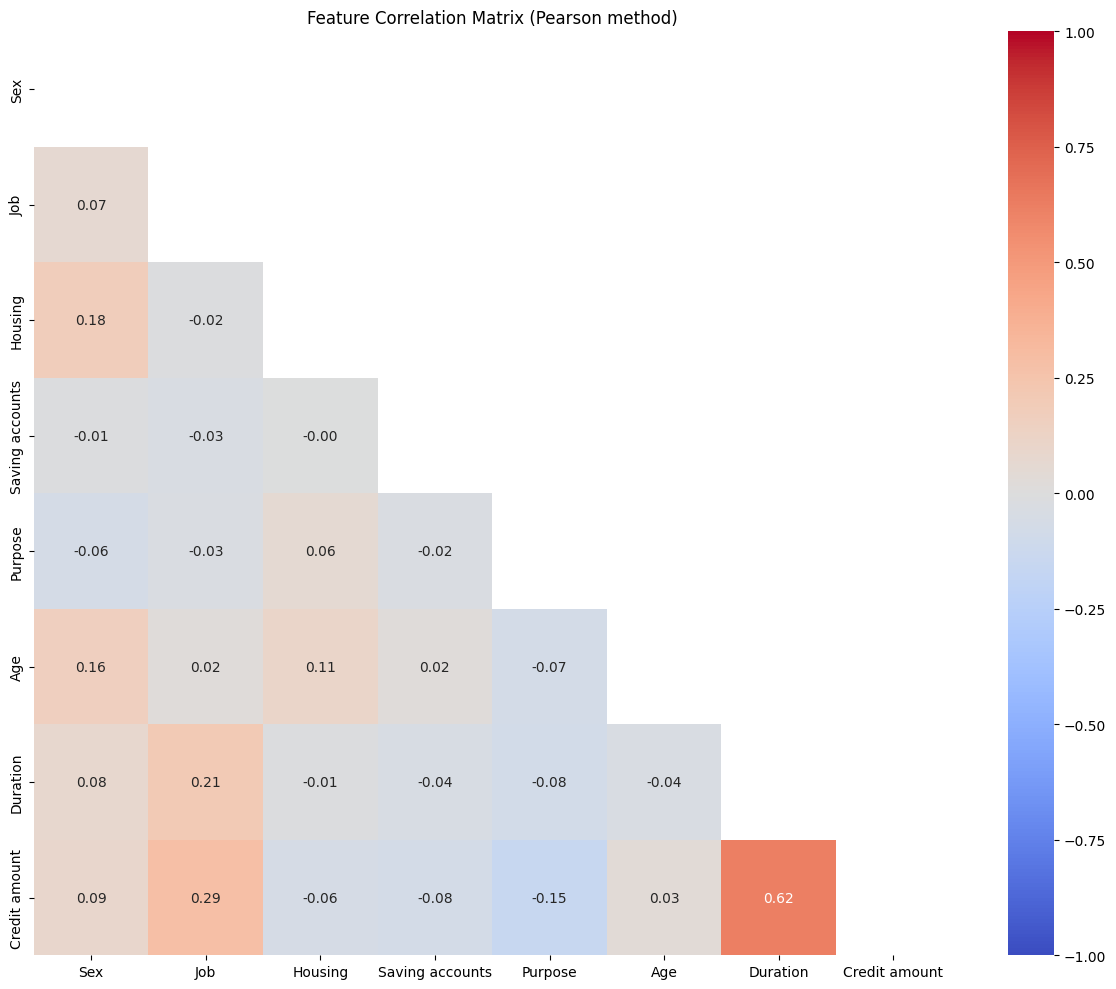

In [14]:
corr_matrix, high_corr_pairs = correlation_matrix(final_data, method='pearson', threshold=0.7, plot=True)

In [15]:
proxy_dict = identify_proxy_variables(final_data, ['Sex', 'Age'])

proxy_dict.items()

dict_items([('Sex', []), ('Age', [])])

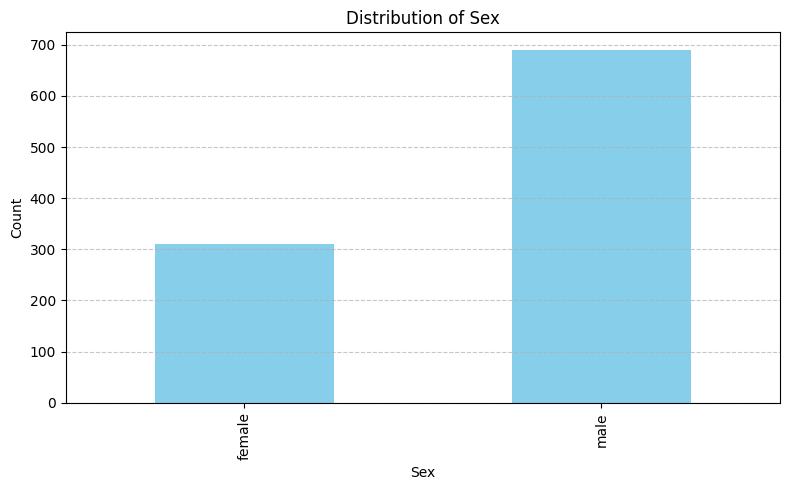

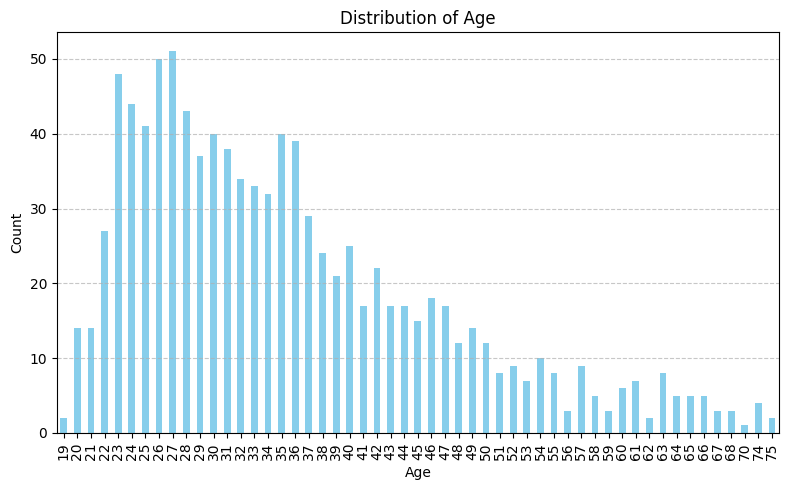

In [16]:
dist_dict = frequency_distribution(processed_data, ['Sex', 'Age'], plot=True)

In [17]:
X_train, X_test, y_train, y_test = split_data(final_data, target_col='Credit amount', test_size=0.2)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Number of features: {X_test.shape[1] if X_train.shape[1] == X_test.shape[1] else -1}")

Training set size: 800 samples
Test set size: 200 samples
Number of features: 7
